In [ ]:
# Utility: Remove dataset folder if re-running the notebook in the same session
import shutil
import os

DATASET_DIR = 'boat-types-recognition'

# Remove the dataset directory if it exists to avoid duplication or conflicts
if os.path.exists(DATASET_DIR):
    shutil.rmtree(DATASET_DIR)
    print(f"Deleted existing dataset directory: {DATASET_DIR}")
else:
    print(f"Dataset directory not found: {DATASET_DIR}")

Dataset directory not found: boat-types-recognition


I'm donwloading the datgaset from kaggle

In [ ]:
import os
# Check for kaggle token if not give one
if not os.path.exists(os.path.expanduser('~/.kaggle/kaggle.json')):
    from google.colab import files
    files.upload()
    !mkdir -p ~/.kaggle
    !mv kaggle.json ~/.kaggle/
    !chmod 600 ~/.kaggle/kaggle.json

Saving kaggle.json to kaggle.json


In [ ]:
# Donwload and unzip the dataset into a working directory
!kaggle datasets download -d clorichel/boat-types-recognition
!unzip boat-types-recognition.zip -d boat-types-recognition

Dataset URL: https://www.kaggle.com/datasets/clorichel/boat-types-recognition
License(s): CC0-1.0
 97% 821M/842M [00:07<00:00, 255MB/s]
100% 842M/842M [00:08<00:00, 110MB/s]
Archive:  boat-types-recognition.zip
  inflating: boat-types-recognition/boats/buoy/alaska-ocean-warning-light-sea-2574393.jpg  
  inflating: boat-types-recognition/boats/buoy/anchor-warp-rope-buoy-beach-2881563.jpg  
  inflating: boat-types-recognition/boats/buoy/beach-buoy-w-water-sea-ocean-1042883.jpg  
  inflating: boat-types-recognition/boats/buoy/beacon-lighthouse-coast-navigation-39232.jpg  
  inflating: boat-types-recognition/boats/buoy/blue-boat-buoy-floating-2834157.jpg  
  inflating: boat-types-recognition/boats/buoy/blue-buoy-float-navigation-ocean-20511.jpg  
  inflating: boat-types-recognition/boats/buoy/boat-water-bird-beach-sand-2840152.jpg  
  inflating: boat-types-recognition/boats/buoy/bojka-buoy-water-bojka-rescue-882679.jpg  
  inflating: boat-types-recognition/boats/buoy/buoy-beach-sea-buoys-s

In [ ]:
# see if the data has been loaded correctly
import os

base_dir = "boat-types-recognition/boats"
for root, dirs, files in os.walk(base_dir):
    print(f"Found {len(dirs)} folders and {len(files)} files in '{root}'")

Found 9 folders and 0 files in 'boat-types-recognition/boats'
Found 0 folders and 239 files in 'boat-types-recognition/boats/cruise ship'
Found 0 folders and 68 files in 'boat-types-recognition/boats/buoy'
Found 0 folders and 21 files in 'boat-types-recognition/boats/inflatable boat'
Found 0 folders and 242 files in 'boat-types-recognition/boats/gondola'
Found 0 folders and 29 files in 'boat-types-recognition/boats/freight boat'
Found 0 folders and 40 files in 'boat-types-recognition/boats/paper boat'
Found 0 folders and 254 files in 'boat-types-recognition/boats/kayak'
Found 0 folders and 81 files in 'boat-types-recognition/boats/ferry boat'
Found 0 folders and 488 files in 'boat-types-recognition/boats/sailboat'


In [ ]:
import os

# Define base directory where dataset is extracted
BASE_DIR = "boat-types-recognition/boats"

# Walk through the dataset directory and log structure
for root, dirs, files in os.walk(BASE_DIR):
    print(f"📂 Directory: {root}")
    print(f"   ├─ Subfolders : {len(dirs)}")
    print(f"   └─ Files      : {len(files)}\n")

📂 Directory: boat-types-recognition/boats
   ├─ Subfolders : 9
   └─ Files      : 0

📂 Directory: boat-types-recognition/boats/cruise ship
   ├─ Subfolders : 0
   └─ Files      : 239

📂 Directory: boat-types-recognition/boats/buoy
   ├─ Subfolders : 0
   └─ Files      : 68

📂 Directory: boat-types-recognition/boats/inflatable boat
   ├─ Subfolders : 0
   └─ Files      : 21

📂 Directory: boat-types-recognition/boats/gondola
   ├─ Subfolders : 0
   └─ Files      : 242

📂 Directory: boat-types-recognition/boats/freight boat
   ├─ Subfolders : 0
   └─ Files      : 29

📂 Directory: boat-types-recognition/boats/paper boat
   ├─ Subfolders : 0
   └─ Files      : 40

📂 Directory: boat-types-recognition/boats/kayak
   ├─ Subfolders : 0
   └─ Files      : 254

📂 Directory: boat-types-recognition/boats/ferry boat
   ├─ Subfolders : 0
   └─ Files      : 81

📂 Directory: boat-types-recognition/boats/sailboat
   ├─ Subfolders : 0
   └─ Files      : 488



Sample class: cruise ship
Path ->  boat-types-recognition/boats/cruise ship
Shape of image ->  (960, 1280, 3)


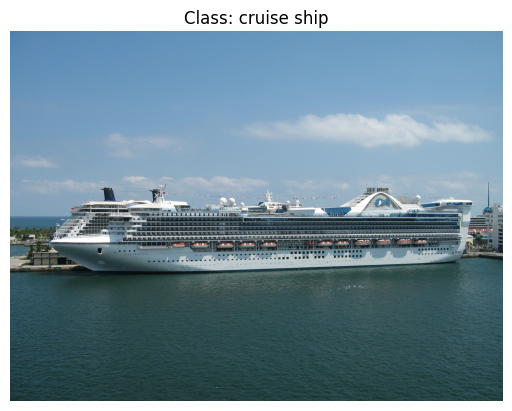

In [ ]:
# Visualize a sample image from the dataset
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

sample_class = os.listdir(base_dir)[0]
sample_path = os.path.join(base_dir, sample_class)

print(f"Sample class: {sample_class}")
print("Path -> ", sample_path)
sample_img_path = os.path.join(sample_path, os.listdir(sample_path)[0])

img = mpimg.imread(sample_img_path)
plt.imshow(img)
print("Shape of image -> ", img.shape)
plt.title(f"Class: {sample_class}")
plt.axis('off')
plt.show()

In [ ]:
import tensorflow as tf

batch_size = 32
img_size = (256, 256)
seed = 43

# Load training and validation datasets (80-20 split)
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    base_dir,
    validation_split=0.2,
    subset="training",
    seed=seed,
    image_size=img_size,
    batch_size=batch_size
)

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    base_dir,
    validation_split=0.2,
    subset="validation",
    seed=seed,
    image_size=img_size,
    batch_size=batch_size
)

# Retrieve class labels
class_names = val_ds.class_names

# Data Augmentation: Applied only to training data
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.RandomFlip("horizontal_and_vertical"),
    tf.keras.layers.RandomRotation(0.2),
    tf.keras.layers.RandomZoom(0.1),
    tf.keras.layers.RandomTranslation(0.1, 0.1),
    tf.keras.layers.RandomContrast(0.1),
], name="data_augmentation")

# Normalization: Scale pixel values to [0, 1]
normalization_layer = tf.keras.layers.Rescaling(1./255)

# Apply augmentation + normalization to training data
train_ds = train_ds.map(lambda x, y: (data_augmentation(normalization_layer(x)), y), num_parallel_calls=tf.data.AUTOTUNE)
val_ds = val_ds.map(lambda x, y: (normalization_layer(x), y), num_parallel_calls=tf.data.AUTOTUNE)

# Prefetch to improve I/O performance during training

train_ds = train_ds.prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.prefetch(buffer_size=tf.data.AUTOTUNE)

Found 1462 files belonging to 9 classes.
Using 1170 files for training.
Found 1462 files belonging to 9 classes.
Using 292 files for validation.


In [ ]:
import json

with open("class_names.json", "w") as f:
    json.dump(class_names, f)

print("Saved class names to 'class_names.json'")

Saved class names to 'class_names.json'


In [ ]:
# Defining our CNN model

model = tf.keras.models.Sequential([
    # Input Layer
    tf.keras.layers.InputLayer(shape=(256, 256, 3)),

    # Convolutional Block 1
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),

    # Convolutional Block 2
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),

    # Global Average Pooling
    tf.keras.layers.GlobalAveragePooling2D(),

    # Fully Connected Layers
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.3),

    # Output Layer
    tf.keras.layers.Dense(9, activation='softmax')  # 9 classes
])

In [ ]:
# Compile the model with appropriate optimizer, loss, and evaluation metrics
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=[
        'accuracy'
    ]
)

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 256, 256, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 256, 256, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 128, 128, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 128, 128, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 128, 128, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 64, 64, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 64)             │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 9)              │         1,161 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 45,769 (178.79 KB)

 Trainable params: 45,577 (178.04 KB)

 Non-trainable params: 192 (768.00 B)

In [ ]:
# Compute class weights due to dataset being skewed
from sklearn.utils.class_weight import compute_class_weight
import numpy as np

# Count samples per class from folder structure
samples_per_class = {
    class_name: len(os.listdir(os.path.join(base_dir, class_name)))
    for class_name in class_names
}

labels = []
for i, class_name in enumerate(class_names):
    labels += [i] * samples_per_class[class_name]

class_weights = compute_class_weight(
    class_weight='balanced',
    classes=np.unique(labels),
    y=labels
)
class_weights = {i: w for i, w in enumerate(class_weights)}
print(class_weights)

{0: np.float64(2.388888888888889), 1: np.float64(0.6796838679683868), 2: np.float64(2.0054869684499312), 3: np.float64(5.601532567049809), 4: np.float64(0.6712580348943985), 5: np.float64(7.735449735449736), 6: np.float64(0.6395450568678915), 7: np.float64(4.061111111111111), 8: np.float64(0.33287795992714025)}


In [ ]:
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=20,
    class_weight=class_weights,
    verbose = 1
)

Epoch 1/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 30s 799ms/step - accuracy: 0.3084 - loss: 1.7249 - val_accuracy: 0.2808 - val_loss: 1.9850
Epoch 2/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 30s 799ms/step - accuracy: 0.3309 - loss: 1.6978 - val_accuracy: 0.1027 - val_loss: 2.6872
Epoch 3/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 30s 782ms/step - accuracy: 0.2875 - loss: 1.7122 - val_accuracy: 0.1541 - val_loss: 2.4853
Epoch 4/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 41s 804ms/step - accuracy: 0.3222 - loss: 1.7738 - val_accuracy: 0.1986 - val_loss: 2.1445
Epoch 5/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 29s 749ms/step - accuracy: 0.3228 - loss: 1.7693 - val_accuracy: 0.1712 - val_loss: 2.4679
Epoch 6/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 29s 758ms/step - accuracy: 0.3165 - loss: 1.7035 - val_accuracy: 0.3356 - val_loss: 1.9571
Epoch 7/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 30s 785ms/step - accuracy: 0.3201 - loss: 1.6472 - val_accuracy: 0.3219 - val_loss: 1.9536
Epoch 8/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 29s 759ms/step - accuracy: 0.3240 - loss: 1.6213 - val_accu

In [ ]:
test_loss, test_accuracy = model.evaluate(val_ds)
print(f"\n Test Loss: {test_loss:.4f}")
print(f" Test Accuracy: {test_accuracy:.4f}")

10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 151ms/step - accuracy: 0.2887 - loss: 2.1766

 Test Loss: 2.2316
 Test Accuracy: 0.2637


In [ ]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Get true and predicted labels
y_true = []
y_pred = []

for images, labels in val_ds:
    preds = model.predict(images)
    preds = tf.argmax(preds, axis=1)

    y_true.extend(labels.numpy())
    y_pred.extend(preds.numpy())

y_true = np.array(y_true)
y_pred = np.array(y_pred)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 448ms/step


In [ ]:
print("Classification Report:")
print(classification_report(y_true, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.33      0.07      0.12        14
           1       0.29      0.04      0.07        52
           2       0.44      0.33      0.38        12
           3       0.33      0.14      0.20         7
           4       0.31      0.67      0.43        45
           5       0.04      0.60      0.07         5
           6       0.34      0.18      0.24        55
           7       0.05      0.25      0.08         4
           8       0.53      0.26      0.34        98

    accuracy                           0.26       292
   macro avg       0.30      0.28      0.21       292
weighted avg       0.39      0.26      0.27       292



/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


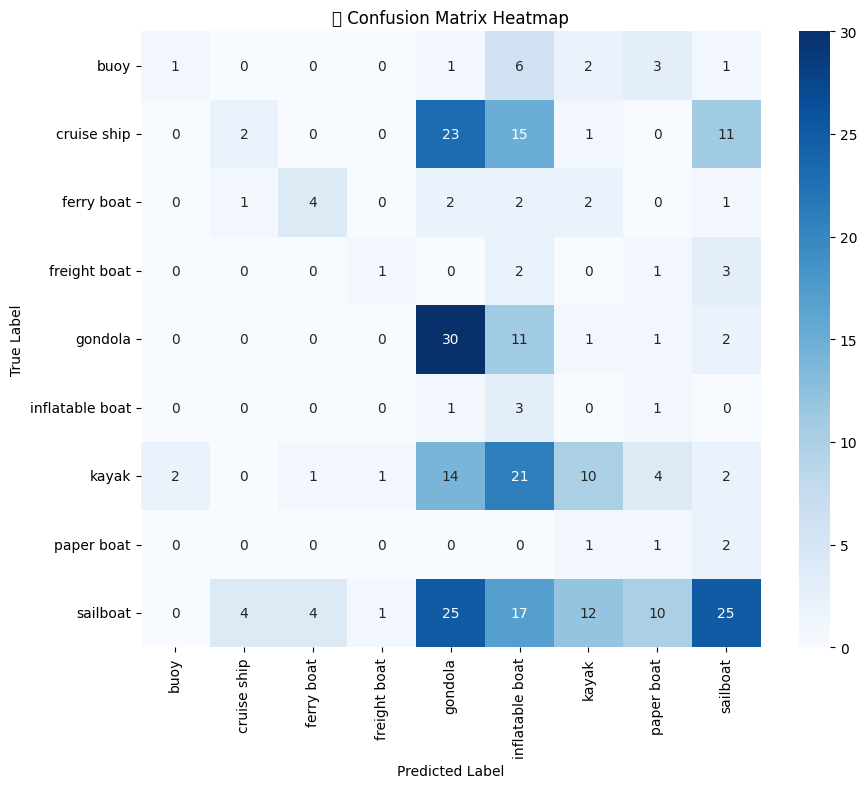

In [ ]:
cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names,
            yticklabels=class_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('🔍 Confusion Matrix Heatmap')
plt.show()


Couldn't get better results from CNN...

# Now lets move onto transfer learning

I am utilising `MobileNetV2` here.

In [ ]:
import tensorflow as tf
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input # importing preprocessing utility for input data of MobileNetV2

base_dir = 'boat-types-recognition/boats'
batch_size = 32
img_size = (224, 224) # img size mobilenet architecture was trained on
seed = 1

# Load datasets (70:30 split)
train_ds_raw = tf.keras.preprocessing.image_dataset_from_directory(
    base_dir,
    validation_split=0.3,
    subset="training",
    seed=seed,
    image_size=img_size,
    batch_size=batch_size,
    shuffle=True
)

test_ds_raw = tf.keras.preprocessing.image_dataset_from_directory(
    base_dir,
    validation_split=0.3,
    subset="validation",
    seed=seed,
    image_size=img_size,
    batch_size=batch_size,
    shuffle=True
)

# Define data augmentation layer (for training only)
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.RandomFlip("horizontal"),
    tf.keras.layers.RandomRotation(0.1),
    tf.keras.layers.RandomZoom(0.1),
    tf.keras.layers.RandomTranslation(0.05, 0.05)
])

class_names = train_ds_raw.class_names
print("Classes:", class_names)

# Apply augmentation and normalization (only on train_ds)
train_ds = train_ds_raw.map(lambda x, y: (data_augmentation(preprocess_input(x)), y),
                        num_parallel_calls=tf.data.AUTOTUNE)

test_ds = test_ds_raw.map(lambda x, y: (preprocess_input(x), y),
                      num_parallel_calls=tf.data.AUTOTUNE)

# Prefetch for performance
train_ds = train_ds.cache().prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.cache().prefetch(buffer_size=tf.data.AUTOTUNE)

Found 1462 files belonging to 9 classes.
Using 1024 files for training.
Found 1462 files belonging to 9 classes.
Using 438 files for validation.
Classes: ['buoy', 'cruise ship', 'ferry boat', 'freight boat', 'gondola', 'inflatable boat', 'kayak', 'paper boat', 'sailboat']


In [ ]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from tensorflow.keras import layers, models

# Load MobileNetV2 as base model
base_model = MobileNetV2(
    input_shape=(224, 224, 3),
    include_top=False, # Exclude classifier head
    weights='imagenet'
)

# Freeze the base model to retain pretrained weights
base_model.trainable = False

# Build the model
model_tf = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),

    layers.Dropout(0.2),

    layers.Dense(256, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.1),

    layers.Dense(128, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.1),

    layers.Dense(9, activation='softmax')  # 9 boat classes
])

9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

model_tf.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=[
        'accuracy'
    ]
)

# callback for early stopping
early_stop = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True,
    verbose=1
)

history = model_tf.fit(
    train_ds,
    validation_data=test_ds,
    epochs=50,
    callbacks=[early_stop]
)

Epoch 1/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 21s 260ms/step - accuracy: 0.3863 - loss: 1.9221 - val_accuracy: 0.7763 - val_loss: 0.7323
Epoch 2/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 55ms/step - accuracy: 0.7906 - loss: 0.6124 - val_accuracy: 0.8265 - val_loss: 0.6000
Epoch 3/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - accuracy: 0.8870 - loss: 0.3599 - val_accuracy: 0.8447 - val_loss: 0.5649
Epoch 4/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 50ms/step - accuracy: 0.9387 - loss: 0.2499 - val_accuracy: 0.8356 - val_loss: 0.5693
Epoch 5/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 50ms/step - accuracy: 0.9686 - loss: 0.1627 - val_accuracy: 0.8174 - val_loss: 0.6183
Epoch 6/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - accuracy: 0.9697 - loss: 0.1478 - val_accuracy: 0.8311 - val_loss: 0.6007
Epoch 7/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - accuracy: 0.9844 - loss: 0.0940 - val_accuracy: 0.8174 - val_loss: 0.5946
Epoch 8/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - accuracy: 0.9863 - loss: 0.0720 - val_accuracy: 0.8151 -

Model stopped early sue to the callback

In [ ]:
model.save("boat_classifier.keras")

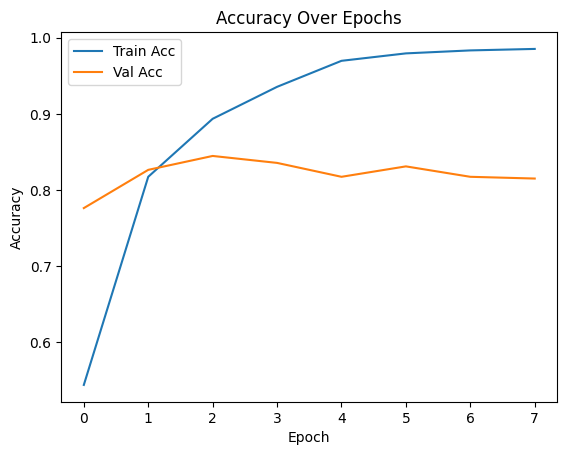

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.title("Accuracy Over Epochs")
plt.show()

In [ ]:
loss, acc = model_tf.evaluate(test_ds)
print(f"Test Accuracy: {acc:.4f}, Test Loss: {loss:.4f}")

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.8645 - loss: 0.4912
Test Accuracy: 0.8447, Test Loss: 0.5649
